在实际中，小样本的情况会经常碰到。本节目的是分辨猫狗，总数据集一共4000张图片，其中2000张做训练，1000张做验证，1000张做测试。

一个简单的小型卷积神经网络，不做任何正则化，会达到71%的精度，如果`数据增强`(data augmentation)后会提高到82%。用预训练特征提取，然后对预训练的网络进行微调，准确率可以达到97%。



In [1]:
import os,shutil

自己创建一个小的训练文件夹命名为 ``

In [2]:
original_data_dir = '/Users/ren/Desktop/data-samples/dogs-vs-cats/original_data/train' # kaggle下载下来的原始数据

'''
以下文件夹创建操作也可以自己完成
'''

base_dir = '/Users/ren/Desktop/data-samples/dog-and-cats_small' # 我们自己的小数据样本集
# os.mkdir(base_dir) 

'''
分别创建训练集 验证集和测试集的目录
'''
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# os.mkdir(train_dir)
# os.mkdir(validation_dir)
# os.mkdir(test_dir)

'''
创建猫和狗自己的训练集 验证集和测试集
'''
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
# os.mkdir(train_cats_dir)
# os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
# os.mkdir(validation_cats_dir)
# os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')
# os.mkdir(test_cats_dir)
# os.mkdir(test_dogs_dir)

'''
开始进行数据填充
'''
# 1000张猫放到训练集
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_data_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# 500张猫放到验证集
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_data_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
# 500张猫放到测试集
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_data_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

'''
对狗的数据集进行如上系列操作
'''
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_data_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_data_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_data_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

上面的动作就是创建我们自己的小数据集，有1000张猫和1000张狗在训练接，有500张猫和500张狗在验证集，有500张猫和500张狗在测试集。书上是用代码验证的，因为都是带序号的，我们自己看一眼也很简单就做完验证了。

好，下面我们来构建网络。

## 构建网络

我们之前构建了一个小型卷积神经网络，现在也用相同的结构，卷及网络有Conv2D（使用 relu 激活）和 MaxPooling2D层交替堆叠。

因为本例子要处理更大的图像和更复杂的问题，需要相应的增加网络。我们会在增加一个Conv2D+MaxPooling2D 的组合。这样既可以增大网络容量，也可以进一步减少特征图的尺寸。

`注意`：
网络中特征图的深度在组件增加(从32到128)，而特征图的尺寸在组件减小(从150x150 减少到 7x7)。这几乎是所有卷积神经网络的模式。

In [3]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

2021-12-18 18:12:58.740169: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


构建上面的网络会比较费劲。因为卷积神经网络更适合在GPU上，我在自己的机器上是用cpu跑的。我们看一下我们构建的网络到底是什么样的。

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [5]:
from tensorflow.keras import optimizers # 这块和书上不一致，版本升级了

model.compile(loss='binary_crossentropy',
                optimizer=optimizers.RMSprop(lr=1e-4),
                metrics=['acc'])

/usr/local/lib/python3.9/site-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


数据输入神经网络前，应该将数据格式化为浮点数张量。处理步骤如下：
1. 读取图片
2. 将jped解码为 rgb 像素网格
3. 将像素网格转换为浮点数张量
4. 将像素值（0-255）缩放到 [0,1]区间

幸运的是，kras有一个图像处理辅助工具。能够讲图像文件自动转换为与处理好的张量。

In [6]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),batch_size=20,class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150, 150),batch_size=20,class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


下面进行数据拟合，之前我们用`fit`,现在实际上用数据生成器不断生成的，所以也要改为`fit_genrator`。我现在用的版本是最新的，Tensorflow已经建议用fit，fit_generator会被废弃掉了，我直接用`fit`了。

In [7]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/30
100/100 [==============================] - 33s 322ms/step - loss: 0.6914 - acc: 0.5375 - val_loss: 0.6696 - val_acc: 0.5710
Epoch 2/30
100/100 [==============================] - 32s 322ms/step - loss: 0.6573 - acc: 0.6105 - val_loss: 0.6426 - val_acc: 0.6250
Epoch 3/30
100/100 [==============================] - 34s 335ms/step - loss: 0.6066 - acc: 0.6705 - val_loss: 0.6335 - val_acc: 0.6330
Epoch 4/30
100/100 [==============================] - 36s 363ms/step - loss: 0.5638 - acc: 0.7055 - val_loss: 0.6262 - val_acc: 0.6430
Epoch 5/30
100/100 [==============================] - 38s 375ms/step - loss: 0.5256 - acc: 0.7375 - val_loss: 0.5765 - val_acc: 0.6880
Epoch 6/30
100/100 [==============================] - 39s 385ms/step - loss: 0.4903 - acc: 0.7640 - val_loss: 0.5633 - val_acc: 0.6980
Epoch 7/30
100/100 [==============================] - 39s 386ms/step - loss: 0.4658 - acc: 0.7745 - val_loss: 0.5849 - val_acc: 0.6900
Epoch 8/30
100/100 [==============================] - 3

在我的macmini2021款上，花费时间太长了，总共花了17分钟。在google的免费gpu上跑的也是非常非常慢，毕竟这个gpu也是全球共享的。

要把训练好的模型保存下。

In [8]:
model.save('cats_and_dogs_small_1.h5')

如之前例子一样，需要进行验证。

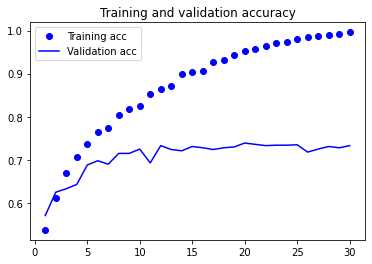

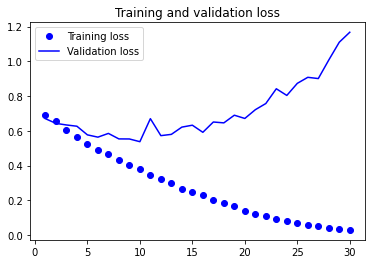

In [9]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

从上面2图看的出来：
1. 明显出现了过拟合的特征
2. 训练精度接近100%
3. 但验证精度一直停留在 70%-72% 左右
4. 验证损失在5轮候就达到了最小值，但是训练损失一直线性下降，最后接近0了

主要是因为训练的样本相对较少，所以过拟合是我们最关心的问题。现在我们用一种针对与视觉领域的新方法，在深度学习处理图像时几乎都会用到这种方法。这就是数据增强。

In [10]:
datagen = ImageDataGenerator(
    rotation_range=40, # 随机旋转的角度 [0,180]
    width_shift_range=0.2, # 随机水平平移的距离，占图片宽度的比例
    height_shift_range=0.2, # 随机垂直平移的距离，占图片宽度的比例
    shear_range=0.2, # 随机错切变换角度
    zoom_range=0.2, #缩放范围
    horizontal_flip=True,  # 将一半图像水平翻转
    fill_mode='nearest'
)

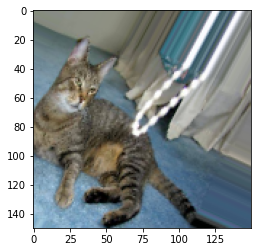

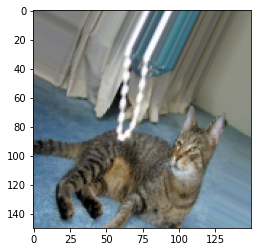

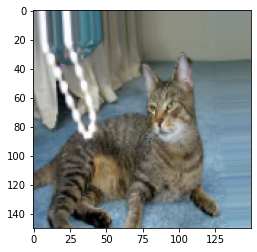

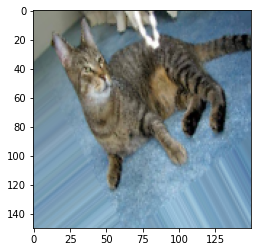

In [11]:
# 进行数据增强

from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[3] # 选择一张图片进行增强

img=image.load_img(img_path, target_size=(150, 150)) # 读取图片，并调整大小

x= image.img_to_array(img) # 将其转换为形状为 (150, 150, 3) 的 numpy 数组
x = x.reshape((1,) + x.shape) # 将其形状改变为 (1, 150, 150, 3)

i=0

for batch in datagen.flow(x,batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

进行上面的数据增强后，虽然网络看不到2次同样的输入，但是仍然是高度相关的，以为后面这些图像也是少量原始图像的变形。因此，这种方法不能完全消除过拟合。为了进一步降低过拟合，需要向模型中添加一个 Dropout 层，天叫道密集连接分类器前。

In [12]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dropout(0.5)) # 添加了这一层

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
                optimizer=optimizers.RMSprop(lr=1e-4),
                metrics=['acc'])

/usr/local/lib/python3.9/site-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


利用数据增强生成器进行将训练卷积神经网络。

In [27]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)  # 特别注意，不能增强验证数据集

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit( # 这个和书上不一样，官方建议采用fit
        # train_generator.repeat(), # 这个也是新加的，否则数据集合不够，下面这行代码就删除了,也可以修改其他参数
        train_generator,
        steps_per_epoch=30, # 这个修改了，书上的会报错，int(1000/batch_size)=30
        epochs=100,
        validation_data=validation_generator,
        validation_steps=14 # 这个修改了，书上的会报错，int(500/batch_size)=30
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
30/30 [==============================] - 15s 478ms/step - loss: 0.5203 - acc: 0.7394 - val_loss: 0.5033 - val_acc: 0.7433
Epoch 2/100
30/30 [==============================] - 15s 482ms/step - loss: 0.5101 - acc: 0.7500 - val_loss: 0.5428 - val_acc: 0.7411
Epoch 3/100
30/30 [==============================] - 16s 525ms/step - loss: 0.5171 - acc: 0.7344 - val_loss: 0.5389 - val_acc: 0.7232
Epoch 4/100
30/30 [==============================] - 15s 504ms/step - loss: 0.5162 - acc: 0.7333 - val_loss: 0.5794 - val_acc: 0.7098
Epoch 5/100
30/30 [==============================] - 14s 462ms/step - loss: 0.5075 - acc: 0.7500 - val_loss: 0.5016 - val_acc: 0.7545
Epoch 6/100
30/30 [==============================] - 15s 489ms/step - loss: 0.5104 - acc: 0.7417 - val_loss: 0.5109 - val_acc: 0.7388
Epoch 7/100
30/30 [==============================] - 16s 527ms/step - loss: 0.5150 - acc: 0.7365 - val_loss: 0.5

In [28]:
model.save('cats_and_dogs_small_2.h5')

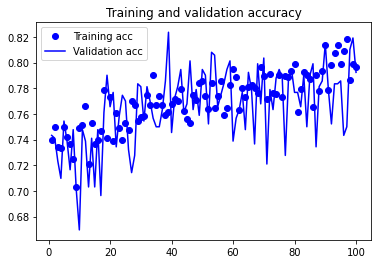

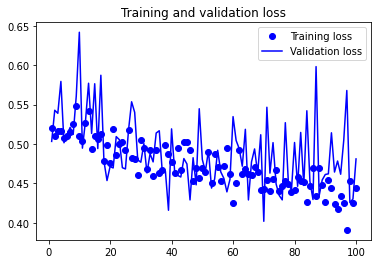

In [29]:

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

通过以上图形可以看出，数据增强后的精度能到82%。若想再提高，已经非常苦难了，主要还是因为数据量太少。
特别注意，书上的代码和后面的图形不一致，主要可能是书上的代码把所有的训练集都用上了，而不是那个small集合。